Source: https://www.kaggle.com/datasets/karangadiya/fifa19

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
player_df = pd.read_csv("data/players.csv")

In [3]:
def wage_split(x):
    try:
        return int(x.split("K")[0][1:])
    except:
        return 0

player_df['Wage'] = player_df['Wage'].apply(lambda x : wage_split(x))

In [4]:
numcols = ['Wage']
catcols = ['Name','Club','Nationality']

In [5]:
player_df = player_df[numcols+catcols]
player_df = player_df.fillna(0)

In [6]:
clubs = ['FC Barcelona', 'Paris Saint-Germain', 'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid','FC Porto','FC Bayern München']
nationalities = ['England', 'Brazil', 'Argentina', 'Brazil', 'Italy','Spain','Germany']

filtered_player_df = player_df[(player_df['Club'].isin(clubs)) & (player_df['Nationality'].isin(nationalities))]

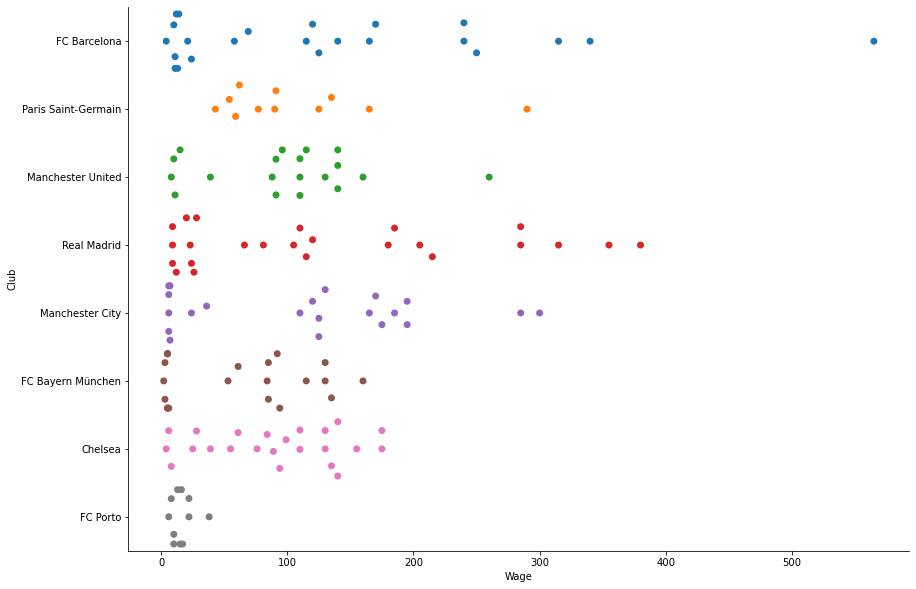

In [7]:
# Plot beeswarm with x as O3

g = sns.swarmplot(
    x = 'Wage', 
    y = "Club",
    data = filtered_player_df,
    size = 7
)

sns.despine()
g.figure.set_size_inches(14,10)

plt.show()
fig = g.get_figure()
fig.set_facecolor("white")
fig.savefig("figures/beeswarm.png", dpi=900, facecolor=fig.get_facecolor())